# Anomaly Detection project using Isolation Forest algorithm

### Load dataset 

In [1]:
import pandas as pd 

df = pd.read_csv("creditcard.csv")

print(df.sample(5))

            Time        V1        V2        V3        V4        V5        V6  \
230003  146143.0 -5.185027 -6.959697 -1.040827  0.517010  4.592622 -2.013309   
216117  140347.0  1.984944 -0.348924 -0.238476  0.500521 -0.719404 -0.613998   
6839      8649.0  1.091500 -0.065354  1.357566  0.935527 -1.229438 -0.915962   
242137  151358.0  0.055900  0.827019  0.220311 -0.615206  0.427250 -1.051023   
247052  153437.0  1.698123 -1.097010 -3.437695 -0.972020  0.927029 -0.663000   

              V7        V8        V9  ...       V21       V22       V23  \
230003 -2.928207  1.120557 -1.086439  ...  0.881816  0.557590  0.132284   
216117 -0.510098 -0.157666  1.030933  ...  0.213410  0.905066  0.114161   
6839   -0.514816 -0.141691  1.785236  ... -0.092990 -0.129869  0.099895   
242137  0.977438 -0.168827  0.044567  ... -0.276289 -0.641216  0.058024   
247052  1.030409 -0.390496  0.383446  ...  0.385499  0.585445 -0.498569   

             V24       V25       V26       V27       V28  Amount  Cl

### Exploring the data.

In [2]:
print("To find number of Samples(row)")
print(df.shape[0]) 
print("To find number of features (columns)")
print(df.shape[1])

print("Datatypes of features ")
#print(df.dtypes) 

print(" Total missing values")
print(df.isnull().sum().sum())

To find number of Samples(row)
284807
To find number of features (columns)
31
Datatypes of features 
 Total missing values
0


In [3]:
# Data Exploration for outlier detection 
import numpy as np 
import seaborn as sns

print("Dataset info:", df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

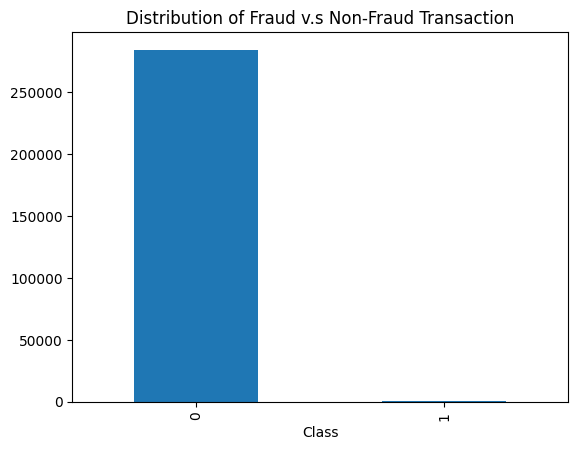

In [4]:
#Summary of statistics 
print(df.describe()) 

#To check the distribution of the target variable (fraud vs non-fraud)
print(df["Class"].value_counts)  

#To visualize 

import matplotlib.pyplot as plt 
%matplotlib inline 
df["Class"].value_counts().plot(kind = "bar")
plt.title("Distribution of Fraud v.s Non-Fraud Transaction")
plt.show()

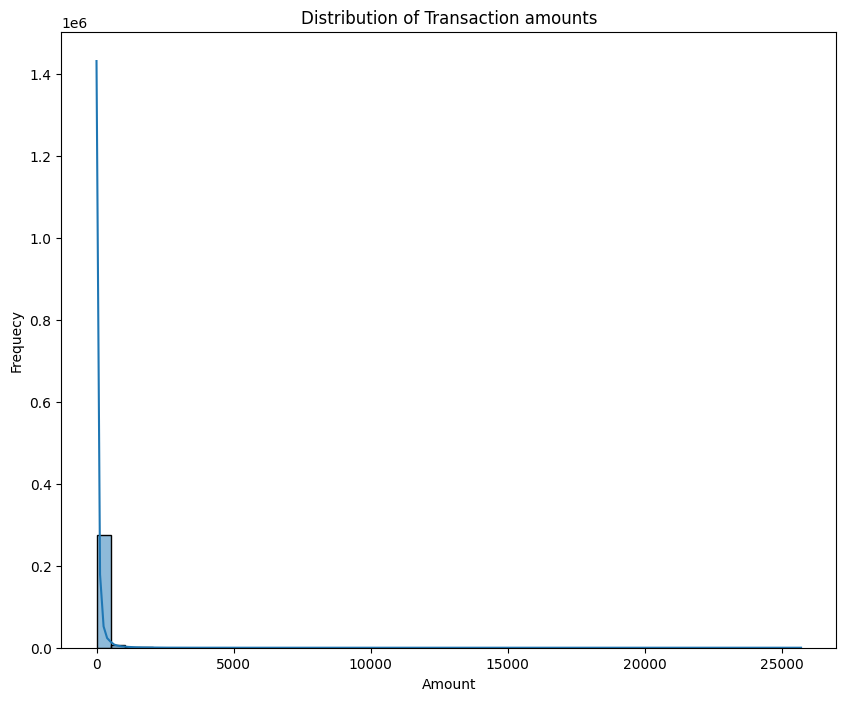

In [5]:
#Visualize the distribution of the 'amount' feature 
plt.figure(figsize = (10,8))
sns.histplot(df['Amount'], bins = 50, kde = True)
plt.title("Distribution of Transaction amounts")
plt.xlabel("Amount")
plt.ylabel("Frequecy")
plt.show()

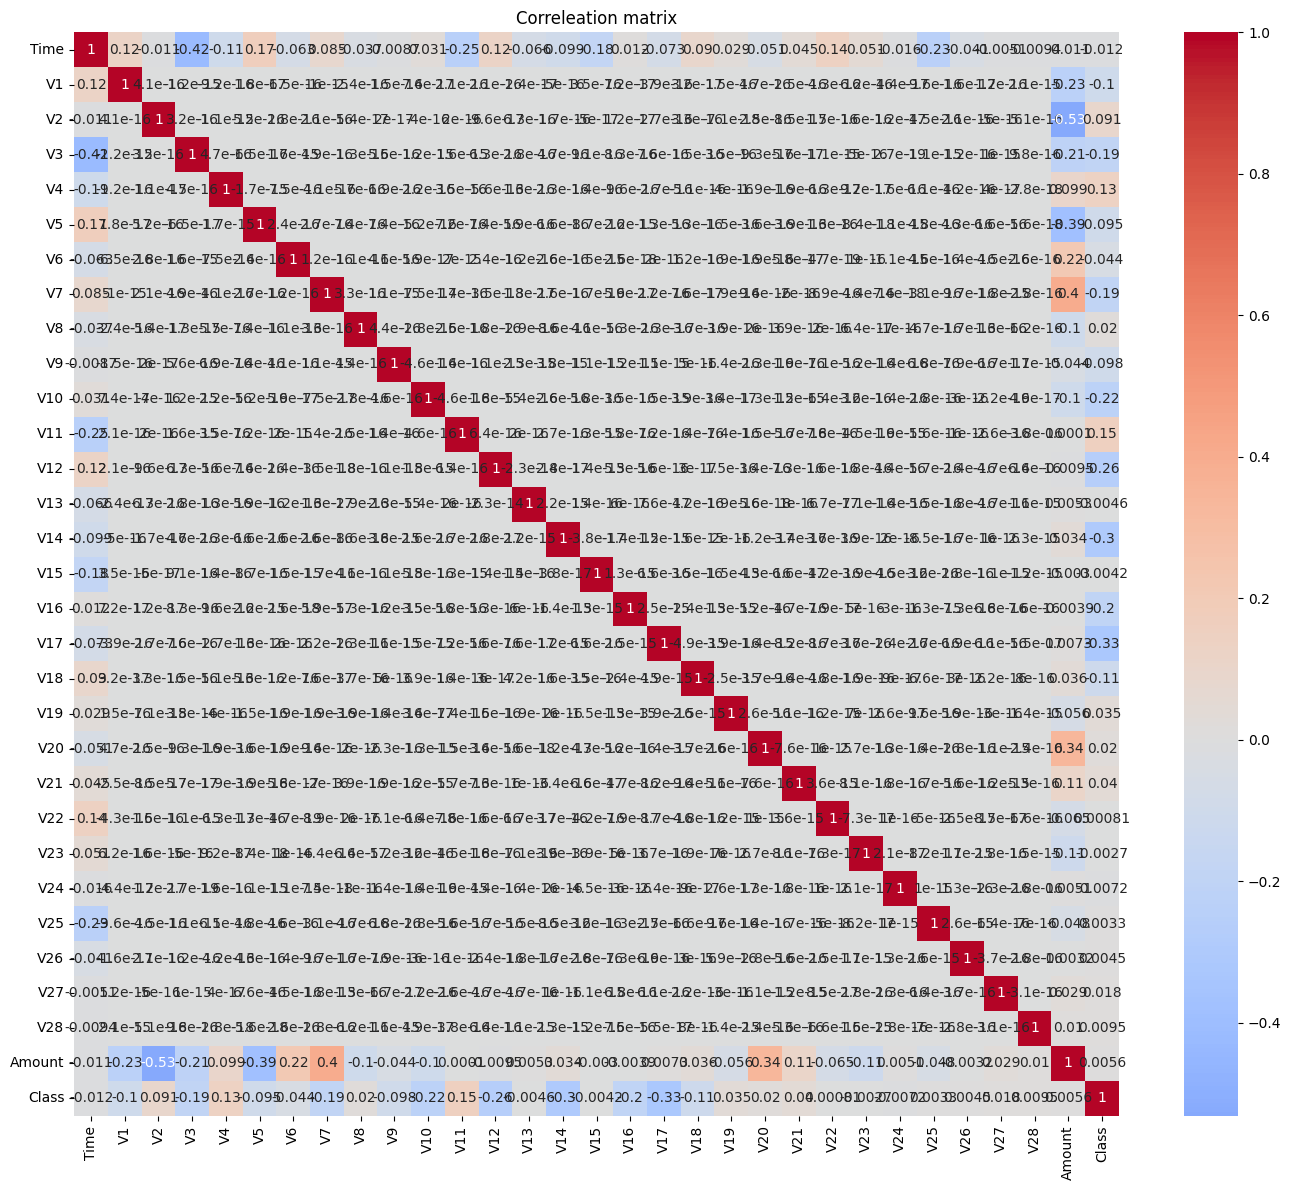

In [6]:
# Correlation matrix 
corr_matrix = df.corr()

#Visualize it 
plt.figure(figsize = (14,12))
sns.heatmap(corr_matrix,annot = True,  cmap = 'coolwarm', center = 0)
plt.title("Correleation matrix")
plt.tight_layout()
plt.show()

In [7]:
#Check for missing value 
print("Missing value count")
print(df.isnull().sum().sum())

#Visulaize missing value(Here there are none, but usually it needs to done)

#plt.figure(figsize = (10,8))
#sns.heatmap(df.isnull(), cbar = False, cmap = "viridis")
#plt.title("Missing Value heatmap")
#plt.show() 

Missing value count
0


## Normalization process 

In [8]:
from sklearn.preprocessing import StandardScaler 
import pandas as pd 
data = pd.read_csv("creditcard.csv")

scaler = StandardScaler() 

#To fit and transform the data 
scaled_data = scaler.fit_transform(data)

#Convert back into df 
scaled_data = pd.DataFrame(scaled_data , columns= data.columns)

#Splitting data into training and testing sets
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(
    scaled_data.drop('Class', axis = 1),
    data["Class"],
    test_size = 0.2,
    random_state = 42
)



## Saving scaler for future use using "joblib"

In [9]:
#Saving scaler for future use 
import joblib
joblib.dump(scaler, "standard_scaler.pkl")

['standard_scaler.pkl']

## Categorical values 

In [10]:
print(df.dtypes)

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [11]:
# Encoding 

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Identify float columns 
float_col = df.select_dtypes(include= ["float64"]).columns  

for col in float_col:
    df[col] = le.fit_transform(df[col])  #By Label Encoding     

## Splitting data 

In [12]:
from sklearn.model_selection import train_test_split

X = df.drop(columns= ["Class"])
y = df["Class"] #Target variable 
X_train, X_test,y_train, y_test = train_test_split(
    X,
    y,
    test_size= 0.2, # 20% will be for testing and other 80% for training
    random_state= 42, #makes sure spilt is constant i.e every time code runs same split is produced.
    stratify= y #Makes sure portion of outliers in train and test are same.
    )

## Model Implementation

In [13]:
from sklearn.ensemble import IsolationForest # Importing req library 

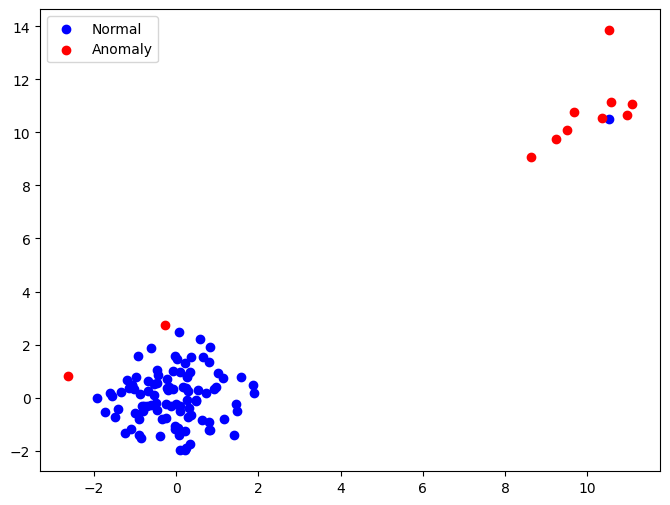

In [14]:
# Simple test to verify installation
if __name__ == "__main__":
    # Create a simple dataset
    np.random.seed(42)
    data = np.concatenate([
        np.random.normal(0, 1, size=(100, 2)),  # Normal data
        np.random.normal(10, 1, size=(10, 2))    # Anomalous data
    ])
    
    # Initialize and fit the model
    model = IsolationForest(contamination=0.1)
    model.fit(data)
    
    # Predict anomalies
    predictions = model.predict(data)
    
    # Plot the results
    plt.figure(figsize=(8, 6))
    plt.scatter(data[predictions == 1, 0], data[predictions == 1, 1], c='blue', label='Normal')
    plt.scatter(data[predictions == -1, 0], data[predictions == -1, 1], c='red', label='Anomaly')
    plt.legend()
    plt.show()

<b>Isolation Forest Algorithm:</b><br> is an unsupervised learning algo built for anomaly detection . It works by isolation anomalies.<br>It works by creatin multiple isolatioin trees. Each tree is built by randomly selecting features and splitting the data until all instances are isolated. The process of isolating instances that are farthest from the others helps identify anomalies efficiently.


In [15]:
#Initialte the Isolation Forest model 
if_model = IsolationForest(
    n_estimators= 100, #Number of trees in the forest 
    max_samples= 'auto', #uses max samples possible (256, n_samples) 
    contamination= 0.1, #Assuming 10% of Anamolies 
    random_state= 42
)

In [16]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Train the model
if_model.fit(X_train)

# Predict 
predictions = if_model.predict(X_test)

# Convert predictions to match the labels
predictions = [1 if pred == -1 else 0 for pred in predictions]   #1 (normal), -1 (anomalous)

# Calculate evaluation metrics
precision = precision_score(y_test, predictions, average='binary')
recall = recall_score(y_test, predictions, average='binary')
f1 = f1_score(y_test, predictions, average='binary')

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1-score: {f1:.3f}")


Precision: 0.015
Recall: 0.867
F1-score: 0.029


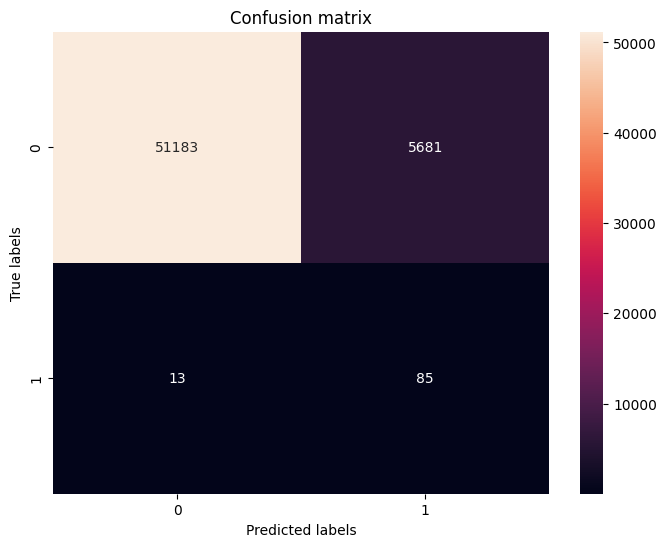

In [17]:
#Analyse the confusion matrix 

from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, predictions) #Confusion matrix 

#Plotting 
plt.figure(figsize= (8,6))
sns.heatmap(cm , annot = True , fmt = 'd')
plt.title("Confusion matrix")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## Model Evaluation

In [18]:
from sklearn.metrics import confusion_matrix, classification_report 

def evaluation_anomaly_detection(y_test, predictions):  #Evaluating the performance by precision, f1- score and recall 
    
    #Calculate confusion matrix 
    cm = confusion_matrix(y_test, predictions) 
    print("Confusion Matrix:\n", cm)
    
    tp = cm[0][0] # True positive (correct prediction for inliner) 
    fp = cm[0][1] # False positive (incorrectly predicted inliner) 
    fn = cm[1][0] # False negative (incorrectly predicted outlier)
    tn = cm[1][1] # True negative (correctly predicted outlier) 
    
    #Calculate precision 
    precision = tp / (tp +fp) if (tp + fp) != 0 else 0  
    print(f"Precision: {precision:.3f}") 
    
    # Calculate recall 
    recall = tp / (tp + fn) if (tp + fn) != 0 else 0 
    print(f"Recall: {recall:.3f}")
    
    # Calculate f1 - score 
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0 
    print(f"F1-score: {f1:.3f}")
    
    return precision , recall, f1 # returns tuple : (precison, recall, f1) 

precision, recall, f1 = evaluation_anomaly_detection(y_test, predictions)


Confusion Matrix:
 [[51183  5681]
 [   13    85]]
Precision: 0.900
Recall: 1.000
F1-score: 0.947


 ## Visualizing High-Dimensional Data with PCA and t-SNE for Anomaly Detection

In [19]:
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE 

#Create PCA instance with 2 components 
pca = PCA(n_components= 2, random_state= 42)

#Fit and transfrom data 
pca_data = pca.fit_transform(X_test)


#Creating t-SNE instance 
tsne = TSNE(n_components= 2, random_state= 42)
tsne_data = tsne.fit_transform(X_test) 

#Get rediction 
predictions = if_model.predict(X_test)

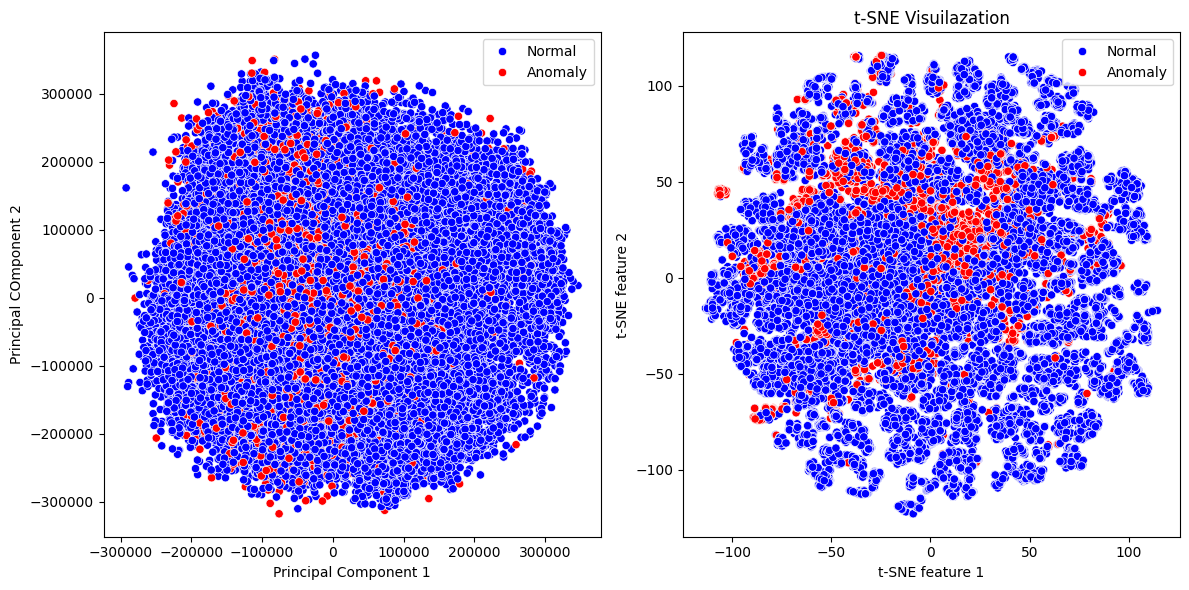

In [21]:
#Visualizing data
fig, axes = plt.subplots(1, 2, figsize= (12, 6))

# Plotting  PCA Data 
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], 
                hue=['Anomaly' if pred == -1 else 'Normal' for pred in predictions], 
                palette={'Anomaly': 'red', 'Normal': 'blue'}, ax=axes[0])
axes[0].set_xlabel("Principal Component 1")
axes[0].set_ylabel("Principal COmponent 2") 

#Plotting T-SNe Data 
sns.scatterplot(x=tsne_data[:, 0], y=tsne_data[:, 1], 
                hue=['Anomaly' if pred == -1 else 'Normal' for pred in predictions], 
                palette={'Anomaly': 'red', 'Normal': 'blue'}, ax=axes[1])
axes[1].set_title("t-SNE Visuilazation")
axes[1].set_xlabel("t-SNE feature 1")
axes[1].set_ylabel("t-SNE feature 2")  

plt.tight_layout()
plt.show()